# __4. Credit Risk Modelling:__ Prediction
## by: __Aprian Immanuel__ (087785160835 / immanuelaprian@gmail.com)

In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc, f1_score, precision_recall_curve, recall_score, precision_score, confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('precredit_test.csv')
df.columns

Index(['NULL', 'LN_ID', 'TARGET', 'CONTRACT_TYPE', 'GENDER', 'NUM_CHILDREN',
       'INCOME', 'APPROVED_CREDIT', 'ANNUITY', 'PRICE', 'INCOME_TYPE',
       'EDUCATION', 'FAMILY_STATUS', 'HOUSING_TYPE', 'DAYS_AGE', 'DAYS_WORK',
       'DAYS_REGISTRATION', 'DAYS_ID_CHANGE', 'WEEKDAYS_APPLY', 'HOUR_APPLY',
       'ORGANIZATION_TYPE', 'EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3'],
      dtype='object')

## __1. Value Encoding:__ This step is for preparing the dataset to be ready feature selected and modelled
### a. INCOME TYPE

In [3]:
df_new = df.copy()
df_new = df_new.dropna(axis=0)
incometype_dict = {'Working': 1, 'Commercial associate': 2, 'Pensioner': 3, 'State servant': 4, 'Unemployed':5}
df_new['income_type_ord'] = df['INCOME_TYPE'].map(incometype_dict)
df_new[['income_type_ord', 'INCOME_TYPE']].head(3)

,income_type_ord,INCOME_TYPE
2,1,Working
3,1,Working
6,1,Working


### b. EDUCATION BACKGROUND

In [4]:
education_dict = {'Secondary / secondary special': 1, 'Higher education': 2, 'Incomplete higher': 3, 'Lower secondary': 4, 'Academic degree': 5}
df_new['education_ord'] = df['EDUCATION'].map(education_dict)
df_new[['education_ord', 'EDUCATION']].head(3)

,education_ord,EDUCATION
2,1,Secondary / secondary special
3,1,Secondary / secondary special
6,1,Secondary / secondary special


## 2. Handling Imbalanced Target - SMOTE Oversampling

In [5]:
x = df_new[['income_type_ord', 'education_ord', 'DAYS_AGE', 'DAYS_WORK', 'EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3']]
y = df_new['TARGET']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [6]:
sm = SMOTE(random_state = 0)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

## 3. Prediction and Evaluation Metrix

In [7]:
#import library sklearn
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [8]:
x_train_sm.shape

(7866, 7)

In [9]:
y_train_sm.shape

(7866,)

In [10]:
model = Sequential()
model.add(Dense(12, input_dim=7, activation='sigmoid'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(x_train_sm, y_train_sm, epochs=20, batch_size=5)
# evaluate the keras model
accuracy = model.evaluate(x_train_sm, y_train_sm)

Epoch 1/20
1574/1574 [==============================] - 104s 4ms/step - loss: 0.6965 - accuracy: 0.5229
Epoch 2/20
1574/1574 [==============================] - 4s 3ms/step - loss: 0.6871 - accuracy: 0.5622
Epoch 3/20
1574/1574 [==============================] - 4s 3ms/step - loss: 0.6905 - accuracy: 0.5310
Epoch 4/20
1574/1574 [==============================] - 4s 3ms/step - loss: 0.6877 - accuracy: 0.5491
Epoch 5/20
1574/1574 [==============================] - 4s 2ms/step - loss: 0.6858 - accuracy: 0.5513
Epoch 6/20
1574/1574 [==============================] - 4s 3ms/step - loss: 0.6859 - accuracy: 0.5393
Epoch 7/20
1574/1574 [==============================] - 4s 3ms/step - loss: 0.6868 - accuracy: 0.5499
Epoch 8/20
1574/1574 [==============================] - 4s 3ms/step - loss: 0.6847 - accuracy: 0.5503
Epoch 9/20
1574/1574 [==============================] - 4s 3ms/step - loss: 0.6863 - accuracy: 0.5539
Epoch 10/20
1574/1574 [==============================] - 4s 2ms/step - loss: 0.6

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [13]:
print('Accuracy: %.2f' ,(accuracy[1]))
print("loss",accuracy[0])

Accuracy: %.2f 0.5551741719245911
loss 0.6864132881164551


## B. Random Forrest Without Tuning

In [14]:
model_RFC = RandomForestClassifier()
model_RFC.fit(x_train_sm, y_train_sm)

RandomForestClassifier()

In [15]:
y_pred_RFC = model_RFC.predict(x_test)
y_pred_RFC

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

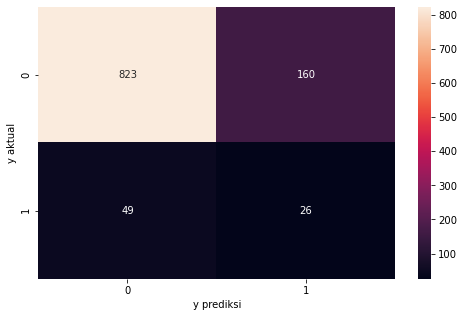

In [16]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_RFC), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y prediksi')
plt.ylabel('y aktual')
plt.show()

In [17]:
# confusion matrix report

print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89       983
           1       0.14      0.35      0.20        75

    accuracy                           0.80      1058
   macro avg       0.54      0.59      0.54      1058
weighted avg       0.89      0.80      0.84      1058



In [18]:
pd.DataFrame(data = [accuracy_score(y_test, y_pred_RFC)*100, recall_score(y_test, y_pred_RFC)*100, precision_score(y_test, y_pred_RFC)*100, roc_auc_score(y_test, y_pred_RFC)*100, f1_score(y_test, y_pred_RFC)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
             columns = ['Score (%)']
            )

,Score (%)
accuracy,80.245747
recall,34.666667
precision,13.978495
roc_auc_score,59.194981
f1_score,19.923372


## From the Evaluation Metrics, we understand that
### Neural Network with Oversampling Technique Algorithm (SMOTE) has better accuracy (92%) for the train dataset than Logistic Regression, Random Forrest and Decision Tree in both after tuned or before tuned. However, Evaluation Metrics show that Random Forrest algorithm has better accuracy, which is 80.24% in Test Dataset than Neural Network.

<hr>